# CS3DM - Lab 3

## Objectives
- Continue developing your exploratory data analysis skills using _Pandas_ and learn some useful data visualisation methods using _Matplotlib_ and _seaborn_.

## Suggested Reading
- Jake VandePlas, *Python Data Science Handbook*, Chapter 4 (Visualization with Matplotlib): <https://jakevdp.github.io/PythonDataScienceHandbook/>
- A fantastic resource for getting good examples of data visualisation in Python, including full code, is the Python Graph Gallery: <https://www.python-graph-gallery.com/>

## Instructions
This is a follow-on tutorial, with some _**TO DO**_ blocks containing specific activities. Please take your time at each block to understand what is being done, and feel free to tinker, explore and modify any block to check your understanding (if you break anything you can always ctrl-Z, or in the worst case download the original Notebook again).
*****

## What is Matplotlib

- `Matplotlib` is a data visualization library built on `NumPy` arrays, originally conceived in 2002 to enable interactive, Matlab-style plotting in IPython.

- In recent years, however, the interface and style of the basic `matplotlib` have begun to show their age, particularly when compared against R's `ggplot2` and `ggvis`, as well as web visualisation toolkits like `D3js`

- As a response, recent `matplotlib` versions have focused on easily changing global plotting styles, and new packages are available that couple `matplotlib`'s powerful internals with cleaner, more modern APIs. Possibly the most well-known example is `Seaborn`, which we'll be using here. 


## Matplotlib in Jupyter Notebooks

- `Matplotlib` was designed for, and is still most often used in, interactive Python sessions. Currently the most common example of these are JupyterLab Notebooks, such as this one.

- To set up `matplotlib` for interactive use, we need to import it and tell the interactive session how we want it to behave:

In [2]:
### Load Libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings # this allows us to better control warning messages

## Settings for the JupyterLab Notebook

After importing the required modules, it is often useful to configure the behaviour of matplotlib (and that of Pandas, while we're at it):

In [3]:
# Set matplotlib to output plots without having to use plt.show()
%matplotlib inline 

# Set max row display
pd.set_option('display.max_row', 200)

# Set iPython's max column width to 60
pd.set_option('display.max_columns', 60)

# Use Seaborn Settings for all plots
sns.set()

# Do not print warning messages
warnings.simplefilter('ignore')
# plt.style.available

There are a number of styles that are available. You access the full list using `plt.style.available`. We'll not go into a lot of detail on those, but feel free to change them using `plt.style.use()` to get more familiar with how they generally look.


## Load data

For this example we'll use the old workhorse of data analysis / data mining courses: the famous _iris_ dataset. This dataset, which dates back almost a century, relates to measurements of different flower dimensions in three species of plants of the genus _Iris_. It has four numerical columns with the attributes, and one nominal column representing the target variable.

In [4]:
### Load Libraries
iris = sns.load_dataset("iris")
print(type(iris))  # <-- To check he data type

iris.head() # <-- to check the first few rows of the data frame

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


When we initially explore a dataset, it is usually a good idea to try and formulate a few questions, and only then develop some plots to investigate them (qualitatively at this point). But let's start by first getting a feel of the data:

In [5]:
# How many rows (records) and columns (variables) do we have?
iris.shape
# iris.species.unique()

(150, 5)

In [6]:
# How many records do we have in each category of the target variable?
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

To give you a sense of what EDA could look like in the context of this data set (e.g., with a relatively small number of data points and variables), we can produce a scatter plot matrix of the features - like the one we saw in Units 3 and 4. Take the time to look at this plot and try to understand what it is showing.

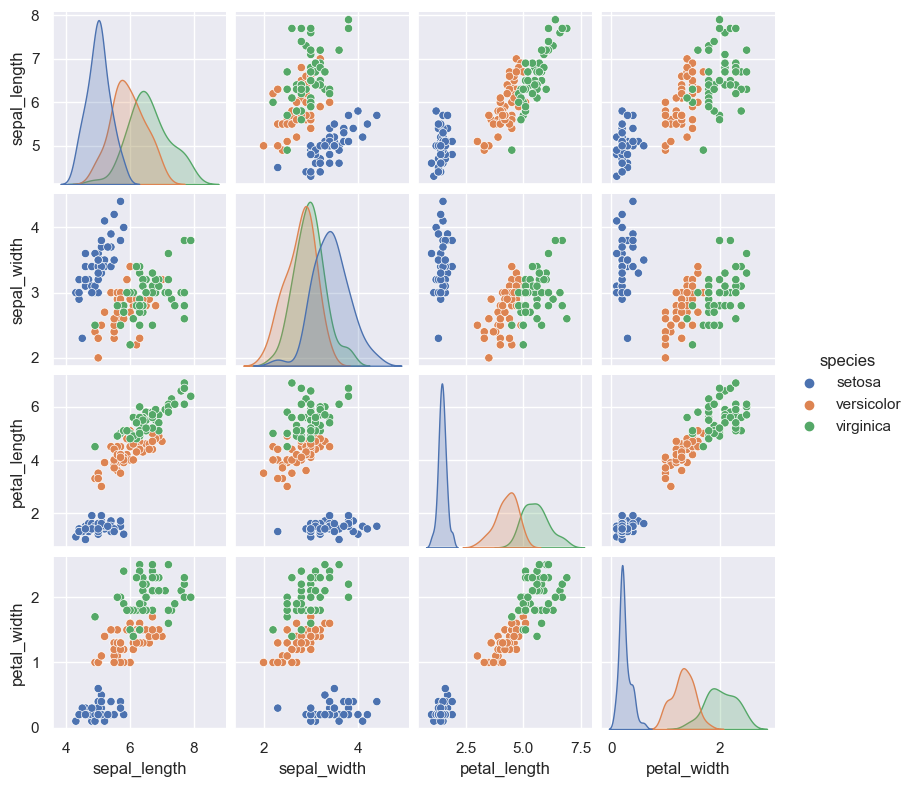

In [7]:
sns.pairplot(iris, hue = 'species', height = 2);

The plot above displays some interesting aspects of this data set. In the main diagonal, we have the estimated probability distributions of each variable conditional on the class label (e.g., the panel at the top left displays the distribution of observations for variable *sepal_length* under each class value (*setosa*, *virginica* and *versicolor*). You define which variable will be used as colour (usually the class attribute) using option `hue` in the call to `sns.pairplot()`. 
Variables with lots of distributional overlap between classes are usually not good predictors of that class (at least in isolation - they may have interaction effects with other variables and add valuable information).

The panels outside the main diagonal of this diagram plot the variable values against each other, coloured by the class value. For instance, the panel at the bottom-left plots values of attributes *sepal_length* vs. *petal_width*. These two variables together seem to be reasonably good at separating the classes (although there's still some overlap). Model fitting algorithms usually pick up on such patterns automatically (since we cannot hope to do it by eye when there are hundreds of variables).

## **TO DO**

Let's explore some visualisation options:

- Open the Python graph gallery: <https://www.python-graph-gallery.com/>. This provides several examples (with code!) of plots that you can build using Python, which can be quite useful for EDA.
- Under section *Distribution*, check the examples of Boxplots and Violin Plots. Violing plots usually offer a richer data representation than Boxplots, by overlaying a simplified boxplot with a density estimation of the distribution of each variable. 
    - Generate a single panel containing the boxplots of variable *petal_length* coloured by class
    - Generate a similar single panel, but containing the violin plots of the same variable. 
    
*****

<Axes: xlabel='petal_length', ylabel='species'>

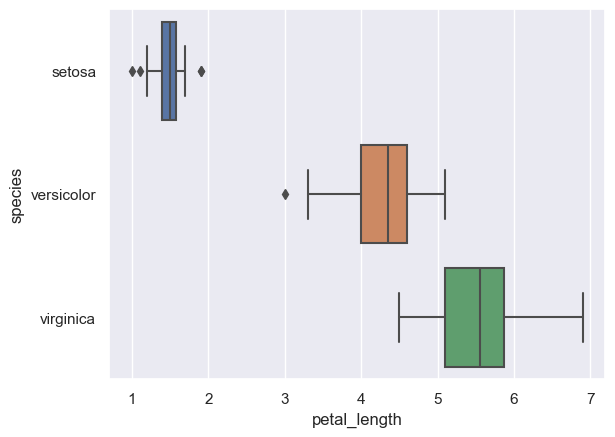

In [9]:
sns.boxplot(x=iris["petal_length"],y=iris["species"])

<Axes: xlabel='petal_length', ylabel='species'>

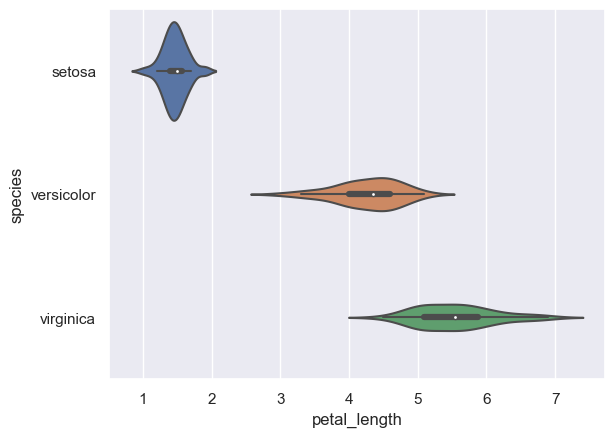

In [10]:
sns.violinplot(x=iris["petal_length"], y=iris["species"])

Some plots can be quite useful to uncover specific aspects of datasets that can inform later data pre-processing steps.
Particularly when we deal with high-dimensional data, doing data exploration in a more savvy way can save a lot of time.

To illustrate some of these aspects, let's load the dataset *lab4_data.csv* (download it from BB and save it in the same folder in which this notebook is located):

In [21]:
import pandas as pd

x = pd.read_csv("lab4_data.csv")
x.Class = x.Class.astype(str)
print(x.shape)

(5350, 501)


We have over 5000 observations of 501 variables. If we investigate a bit further, we'll see that there is one class attribute and 500 features:

In [22]:
x.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,...,feature_470,feature_471,feature_472,feature_473,feature_474,feature_475,feature_476,feature_477,feature_478,feature_479,feature_480,feature_481,feature_482,feature_483,feature_484,feature_485,feature_486,feature_487,feature_488,feature_489,feature_490,feature_491,feature_492,feature_493,feature_494,feature_495,feature_496,feature_497,feature_498,feature_499
count,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5350.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5350.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,...,5350.000000,5329.000000,5329.000000,5350.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5350.000000
mean,0.042809,0.156243,0.030994,0.124028,-0.098827,-0.046841,-0.160775,-0.056153,-0.145130,-0.045325,0.117815,0.063626,-0.051006,0.125583,-0.028934,0.051697,0.491302,-0.052297,0.068653,-0.089286,0.109375,0.031340,0.020416,0.184842,0.084107,0.110113,-0.045507,0.027719,-0.042223,-0.101923,...,-0.034267,0.013543,0.078718,-0.101463,0.060869,0.059658,0.014053,-0.089742,0.049711,0.207725,0.294707,-0.154586,-0.060437,-0.109885,-0.024998,0.181693,-0.120186,-0.031485,-0.068987,0.030051,0.001927,-0.128145,0.146998,0.135768,0.048576,-0.037599,-0.028742,0.006973,-0.006959,-0.053871
std,0.173535,0.147624,0.184873,0.140351,0.165003,0.163186,0.179534,0.221469,0.207628,0.159922,0.162751,0.184352,0.193455,0.172291,0.218562,0.145286,0.250582,0.164128,0.154727,0.163743,0.182819,0.166491,0.152912,0.191379,0.184812,0.191504,0.183127,0.175654,0.227582,0.165799,...,0.154463,0.176246,0.175530,0.190974,0.157277,0.184567,0.176235,0.142531,0.172724,0.182252,0.194981,0.156670,0.172647,0.189138,0.199385,0.151887,0.195932,0.159509,0.185006,0.165102,0.179113,0.172342,0.183332,0.169558,0.199614,0.203271,0.153981,0.161298,0.165594,0.177582
min,-0.595948,-0.594108,-0.806463,-0.513349,-0.867737,-0.851466,-0.907043,-1.005215,-1.114053,-0.890890,-0.609815,-0.640934,-0.700937,-0.674998,-0.834096,-0.777640,-0.722672,-0.776162,-0.501223,-0.635287,-0.457410,-0.552226,-0.763353,-0.570852,-0.608817,-1.029076,-0.841211,-0.762459,-0.950863,-0.697805,...,-0.553819,-0.623997,-0.580698,-0.849948,-0.612355,-0.729465,-0.693593,-0.673425,-0.614518,-0.563994,-0.404187,-1.056762,-1.129273,-0.816000,-0.676067,-0.607322,-0.778154,-0.857518,-0.654452,-0.580280,-0.632628,-0.788635,-0.680578,-0.492439,-0.751919,-0.693775,-0.692252,-0.644097,-0.645067,-0.792640
25%,-0.067241,0.059511,-0.091689,0.034867,-0.206547,-0.157601,-0.264609,-0.211117,-0.252742,-0.138290,0.017765,-0.065599,-0.175818,0.016755,-0.152093,-0.037489,0.338088,-0.149375,-0.032521,-0.205539,-0.016405,-0.080505,-0.078536,0.064250,-0.033181,-0.000707,-0.153600,-0.090167,-0.175429,-0.210732,...,-0.138013,-0.103663,-0.027335,-0.233576,-0.042045,-0.057925,-0.105799,-0.178103,-0.056484,0.091206,0.171342,-0.253882,-0.173609,-0.228320,-0.168026,0.079410,-0.257045,-0.128472,-0.188894,-0.076889,-0.120544,-0.236419,0.046751,0.024750,-0.057318,-0.174803,-0.127798,-0.101294,-0.107976,-0.176316
50%,0.034568,0.153748,0.029528,0.124603,-0.099272,-0.049042,-0.146696,-0.067107,-0.133313,-0.034319,0.118437,0.058765,-0.065694,0.127003,-0.001990,0.052337,0.504111,-0.048576,0.065608,-0.089645,0.096553,0.027137,0.022994,0.188782,0.094512,0.113477,-0.0394

To examine a dataset with so many features, we need to be a bit more savvy than we've been so far. Try the following:


## **TO DO**:
(complete your activities using the template code blocks below)

1. Check for missing values in this data. It is worth also checking if eventual missing values are concentrated in some specific rows or columns, which can inform our strategy to deal with them.
    - Calculate how many missing values we have for each column. Plot these values as a line chart, using `plt.plot()`. This should highlight any variables (columns) with a high concentration of missing values. Use the plot to decide on a threshold (e.g., 500 or 800 missing values - it's up to you) and use this threshold to remove columns with too many missing values.
    - Now calculate how many missing values we have for each **row**. Follow the same process used above, now removing rows that have too many missing values - these are unlikely to have much info anyway, and are usually best removed. Note that your threshold will probably be different. Summarising quantities per row can be done using option `axis=1` in the call to method `.sum()`
    - After doing both steps, double check if there are any rows with remaining missing values. These can be treated in a variety of ways, but for now we'll simply remove these rows (if needed).

In [23]:
## CHECK AND REMOVE COLUMNS WITH TOO MANY MISSING VALUES

# 1) you can use a combination of methods .isnull() and .sum() to uncover the number of missing values per column
missing_per_column = x.isnull().sum()# <--- COMPLETE HERE

# 2) Add your line plot here
# plt.plot(missing_per_column.index, missing_per_column.values)
# plt.plot(missing_per_column.index.str.replace("feature_",""), missing_per_column.values)

# # 3) build a logical index based on the threshold that you decided after looking at the plot
idx = missing_per_column < 500 # <--- ADD YOUR THRESHOLD VALUE HERE
# print(f"Count {x.shape[1] - idx.sum()}") #count of column with atleast 1 missing values

# # 4) Use the index to select only columns with fewer missing values than your threshold. 
# #    You can do that using logical indexing, x = x.loc[...]
# x = # <--- COMPLETE HERE
x=x.loc[:,idx]

##verify the column is gone
# x.loc[:,x.isnull().sum() >500] #no.of columns with missing values >500

Count 21


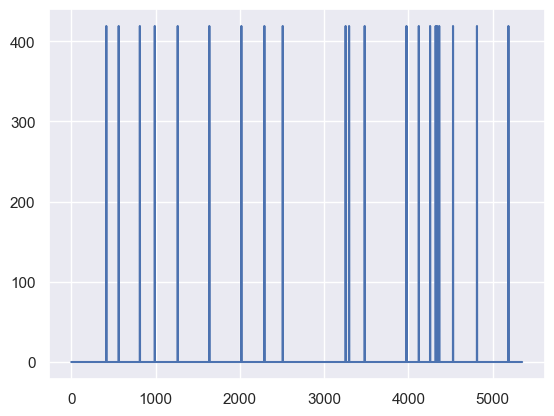

In [24]:
## CHECK AND REMOVE ROWS WITH TOO MANY MISSING VALUES
missing_per_row=x.isnull().sum(axis=1)

plt.plot(missing_per_row)

#remove the rows
idx= missing_per_row < 400
print(f"Count {missing_per_row[missing_per_row>0].count()}") #count of rows with atleast 1 missing values
#or
# print(f"Count {x.shape[0] - idx.sum()}") #count of rows with atleast 1 missing values

# print(missing_per_row[missing_per_row>0]) # rows with atleast 1 missing values

x=x.loc[idx, :]


0


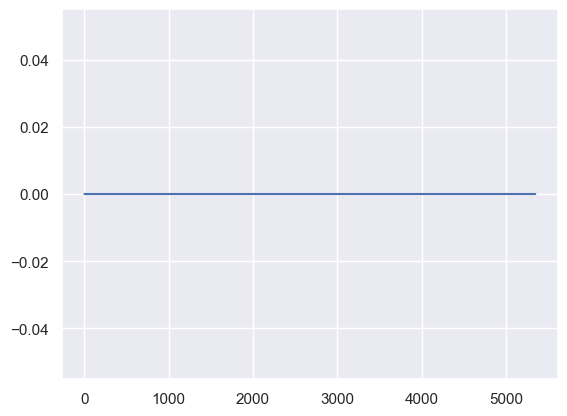

In [25]:
# Double check if there are any more missing values in the rows
missing_per_row=x.isnull().sum(axis=1)
print(missing_per_row.sum())
plt.plot(missing_per_row)

2. Check for outliers. Eyeballing outliers in 500+ columns can be daunting. Instead, we can use the fact that outliers commonly affect variable skewness to investigate this issue indirectly (at least for the case of univariate outliers).
    - Calculate the skewness of all your *numerical* columns (i.e., all except the Class column (column 0).
    - Plot the skewness value using `plt.plot()`
    - Isolate variables with unusually high or unusually low skewness values. These are commonly values greater than thresholds of about 1.5 or 2 (or lower than -1.5 or -2).
    - Plot a density plot (check on the Python Graph Gallery) to try to investigate this variable. Use the "rug" option to highlight outliers. Alternatively, a simple box plot would also have the same effect.
    - There are several ways of dealing with outliers. For now just remove the observation (row) containing the outlier (although this is rarely the best way to deal with outlier values).

,feature_450
0,-1.783582
1,-1.922215
2,-1.902909
3,-1.892315
4,-1.963267
...,...
5345,-1.726005
5346,-1.747774
5347,-1.668648
5348,-1.961090


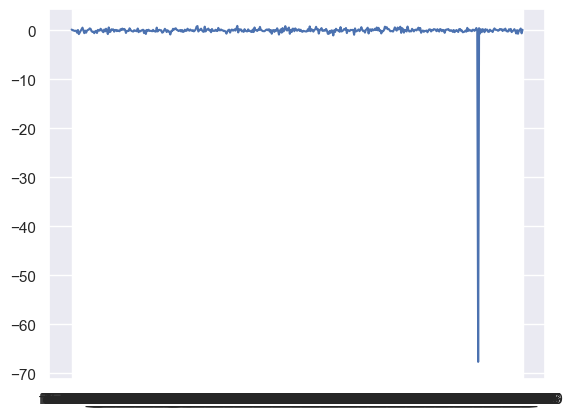

In [27]:
## CHECK FOR OUTLIERS

# 1) use the .skew() method to calculate the skewness
skew = x.skew(numeric_only=True) 

# 2) Add your line plot here
# <--- ADD YOUR PLOT CODE HERE
plt.plot(skew)
# plt.plot(pd.to_numeric(skew.index.str.replace("feature_","")),skew.values)

# # 3) build a logical index based on the threshold that you decided after looking at the plot
idx = abs(skew) > 10 # <--- ADD YOUR THRESHOLD VALUE HERE
idx["Class"]=False
# # 4) Use the index to select only columns with large absolute skewness values for investigation
# #    You can do that using logical indexing, x = x.loc[...]
tmp = x.loc[:,idx] #get the column(s) with the condition (skew>10)
# tmp = skew[idx].index.tolist()
# tmp

(5329, 500)
(5328, 500)


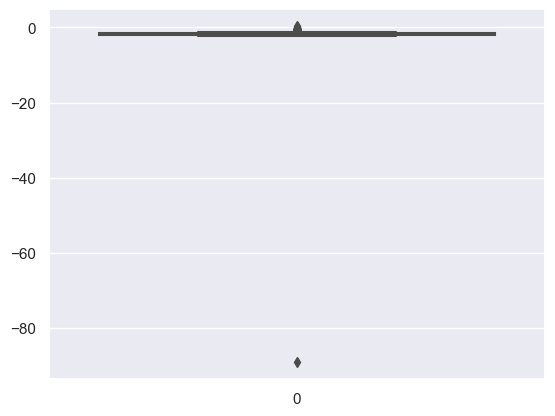

In [39]:
# 5) Plot a density plot or a boxplot to investigate for outliers
# <--- ADD YOUR PLOT CODE HERE
# sns.kdeplot(tmp)
# sns.distplot(tmp, rug=True)
# sns.stripplot(y=x['feature_450',color="orange", jitter=0.2, size=2.5)

sns.boxplot(tmp.iloc[:,0])

# # 6) If there are really one or more outliers, remove the row(s) containing these values:
# # <--- get the index of row(s) containing outliers.

index= tmp >-80
idx= index.iloc[:,0] # booleans indicating which rows meets the condition for the column gotten
print(x.shape)
x=x.loc[idx,:] #Select the rows that only satisfy the condition.
print(x.shape)

3. Check variable ranges: the final step in our preprocessing will be to the ranges of our numerical variables. For that, we can again use our basic lineplot:
    - calculate the range of the variables (a combination of the `max()` and `min()` methods is sufficient here
    - Use `plt.plot()` to plot the ranges. Take a look at what this plot reveals.
    - If there are variables with very distinct ranges, this is a suggestion that we may benefit from variable normalisation. An example of normalisation code is shown at the bottom of the next cell.

feature_0      1.289205
feature_1      1.477190
feature_2      1.614252
feature_3      1.169421
feature_4      1.486092
                 ...   
feature_495    1.663583
feature_496    1.311583
feature_497    1.440123
feature_498    1.168689
feature_499    1.795075
Length: 499, dtype: float64


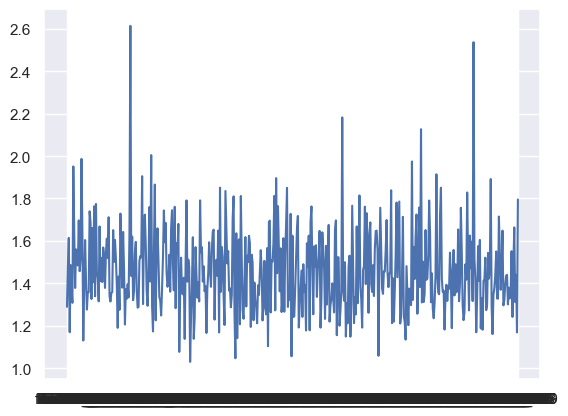

In [40]:
xmin = x.min(numeric_only=True) # <--- COMPLETE HERE
xmax = x.max(numeric_only=True) # <--- COMPLETE HERE
xrange = xmax - xmin
print(xrange)

# ADD YOUR PLOT of xrange HERE
# # <--- COMPLETE HERE
plt.plot(xrange)

In [41]:
#=====
# Quick code for normalisation (after outlier removal):
normalised_x = (x.iloc[:,1:] - x.iloc[:,1:].min()) / (x.iloc[:,1:].max() - x.iloc[:,1:].min())
normalised_x["Class"] = x.Class
normalised_x.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,...,feature_470,feature_471,feature_472,feature_473,feature_474,feature_475,feature_476,feature_477,feature_478,feature_479,feature_480,feature_481,feature_482,feature_483,feature_484,feature_485,feature_486,feature_487,feature_488,feature_489,feature_490,feature_491,feature_492,feature_493,feature_494,feature_495,feature_496,feature_497,feature_498,feature_499
count,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,...,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000
mean,0.495479,0.507973,0.518748,0.545074,0.517411,0.586510,0.570528,0.486480,0.590112,0.613600,0.466455,0.473488,0.437951,0.471881,0.552477,0.547935,0.611036,0.439636,0.504178,0.390791,0.353360,0.413078,0.614212,0.556131,0.510123,0.654857,0.471821,0.595891,0.547221,0.424002,...,0.403134,0.549311,0.489705,0.543317,0.468654,0.508996,0.532596,0.439705,0.387361,0.497013,0.510312,0.617550,0.648375,0.544869,0.493046,0.565450,0.458010,0.573719,0.450170,0.442361,0.477526,0.487327,0.533400,0.506014,0.539938,0.394414,0.505858,0.452111,0.546053,0.411675
std,0.134615,0.099939,0.114495,0.119997,0.111040,0.118934,0.137262,0.113524,0.126361,0.116042,0.104343,0.123897,0.130353,0.101552,0.149979,0.095995,0.126136,0.099659,0.136885,0.117187,0.113982,0.117869,0.119822,0.140838,0.136051,0.110065,0.108497,0.132436,0.137049,0.117982,...,0.119849,0.151854,0.130350,0.138445,0.109490,0.119002,0.132639,0.107382,0.100700,0.117313,0.142274,0.107237,0.104741,0.145946,0.151006,0.108855,0.136400,0.110753,0.142238,0.119675,0.134803,0.127147,0.118161,0.136510,0.134654,0.122190,0.117396,0.112006,0.141659,0.098995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.410088,0.442509,0.442781,0.468801,0.444915,0.505774,0.491162,0.407072,0.524635,0.546136,0.402320,0.386662,0.353921,0.407727,0.467972,0.489018,0.533890,0.380688,0.414708,0.307568,0.274924,0.333883,0.536711,0.467399,0.423793,0.591180,0.407833,0.506992,0.467031,0.346555,...,0.322645,0.448332,0.410948,0.447657,0.397011,0.433141,0.442436,0.373135,0.325424,0.421947,0.420311,0.549575,0.579685,0.453612,0.384731,0.492136,0.362755,0.506337,0.357949,0.364847,0.385317,0.407453,0.468790,0.416577,0.468516,0.311932,0.430315,0.376915,0.459580,0.343453
50%,0.489083,0.506306,0.517821,0.545597,0.517117,0.584882,0.581215,0.480884,0.597292,0.621578,0.466824,0.470225,0.428078,0.472706,0.570944,0.548360,0.617494,0.441932,0.501462,0.390549,0.345369,0.409978,0.616206,0.559009,0.517776,0.656786,0.475350,0.595330,0.563393,0.423535,...,0.401294,0.542007,0.490916,0.542209,0.464512,0.506889,0.525450,0.445480,0.384861,0.500492,0.500020,0.617305,0.6531

4. Finally, as a bit of an eye candy: The code below is a projection of the resulting dataset (after all preceding steps) down into a 2D space using t-SNE (see, e.g., <https://towardsdatascience.com/t-sne-python-example-1ded9953f26>). This is useful for visualising the grouping structure of the data - sometimes classes (colours) are so well-separated that it indicates a trivial classification problem; while at other times the separation is not so clear, suggesting a more challenging problem for the algorithms that will be deployed later. Which type do we have?

[Text(0.5, 1.0, 't-SNE projection of 500-dimensional data')]

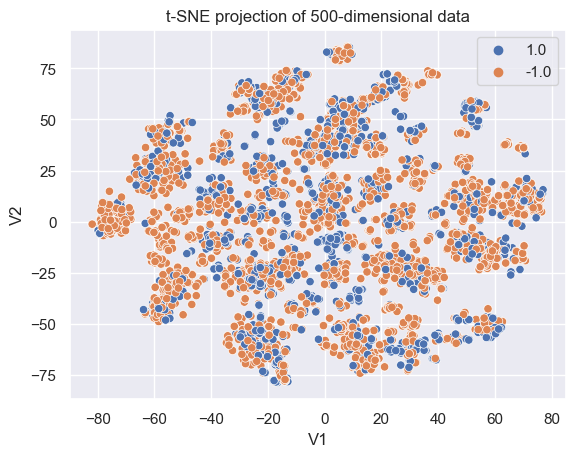

In [42]:
from sklearn.manifold import TSNE

# Initialise T-SNE
tsne = TSNE(n_components=2, random_state=44)

# Fit the t-SNE transformation
M = tsne.fit_transform(normalised_x.iloc[:,0:499]) 

# Plot 
df = pd.DataFrame()
df["Class"] = normalised_x.Class
df["V1"] = M[:,0]
df["V2"] = M[:,1]

sns.scatterplot(x = "V1", y = "V2", 
                hue = df.Class.tolist(),
                data=df).set(title="t-SNE projection of 500-dimensional data") 